In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [3]:
os.chdir("C:\\Users\\khush\\OneDrive\\Documents\\")
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
dataset.shape

(1156, 7)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [11]:
#we know that purpose have so many null values.
dataset["PURPOSE"].fillna("Not",inplace=True)
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [20]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
                                       errors='coerce')
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1151,NaT,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaN,NaN,NaN
1152,NaT,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,NaN,NaN,NaN
1153,NaT,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,NaN,NaN,NaN
1154,NaT,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaN,NaN,NaN


In [17]:
dataset["date"] = pd.DatetimeIndex(dataset["START_DATE"]).date
dataset["time"] = pd.DatetimeIndex(dataset["START_DATE"]).hour
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0
...,...,...,...,...,...,...,...,...,...
1151,NaT,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaN,NaN
1152,NaT,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,NaN,NaN
1153,NaT,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,NaN,NaN
1154,NaT,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaN,NaN


In [18]:
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [19]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1151,NaT,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaN,NaN,NaN
1152,NaT,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,NaN,NaN,NaN
1153,NaT,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,NaN,NaN,NaN
1154,NaT,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaN,NaN,NaN


In [23]:
#removing all duplicates and null values from the dataset.
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,12-12-2016 13:32,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon
1044,2016-12-12 13:36:00,12-12-2016 13:51,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon
1045,2016-12-12 14:26:00,12-12-2016 14:39,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon
1046,2016-12-12 17:51:00,12-12-2016 18:01,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening


<Axes: xlabel='day-night', ylabel='count'>

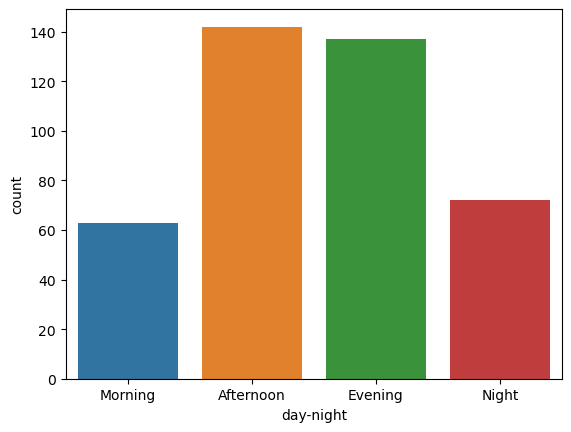

In [31]:
sns.countplot(x="day-night", data=dataset)

<Axes: xlabel='CATEGORY', ylabel='count'>

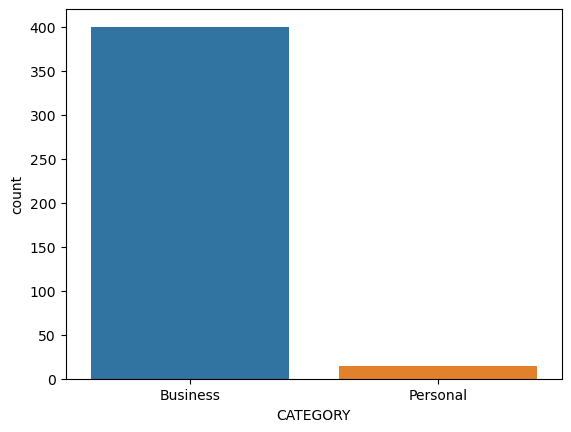

In [32]:
#In afternoon and evening people prefer uber.
sns.countplot(x="CATEGORY", data= dataset)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Not'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

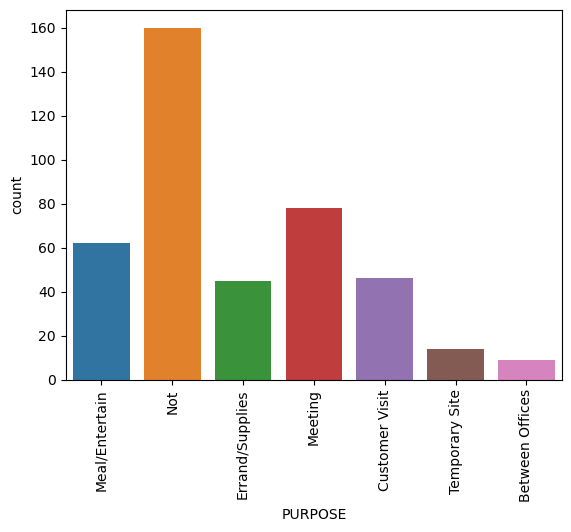

In [34]:
#most of the people use uber for business.
sns.countplot(x="PURPOSE", data=dataset)
plt.xticks(rotation=90)

C:\Users\khush\AppData\Local\Temp\ipykernel_11380\3239613594.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset["MILES"]<40]["MILES"])


<Axes: xlabel='MILES', ylabel='Density'>

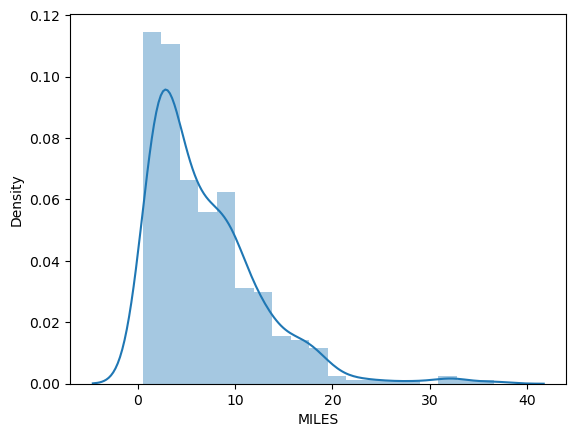

In [36]:
# people dont defining their purpose are more although second most Purpsose is Meeting.
sns.distplot(dataset[dataset["MILES"]<40]["MILES"])

In [ ]:
#most people use it for distance upto 20 miles.